In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

import plotly.graph_objects as go

In [3]:
employees=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Showing a breakdown of distance from home by job role and attrition.¶

In [4]:
employees_breakdown=employees.groupby(['Attrition','JobRole'])['DistanceFromHome'].sum().reset_index()
employees_breakdown

,Attrition,JobRole,DistanceFromHome
0,No,Healthcare Representative,1123
1,No,Human Resources,264
2,No,Laboratory Technician,1838
3,No,Manager,769
4,No,Manufacturing Director,1287
5,No,Research Director,661
6,No,Research Scientist,2173
7,No,Sales Executive,2428
8,No,Sales Representative,450
9,Yes,Healthcare Representative,159


# A graph showing a relationship between attrition,distance from home and job role

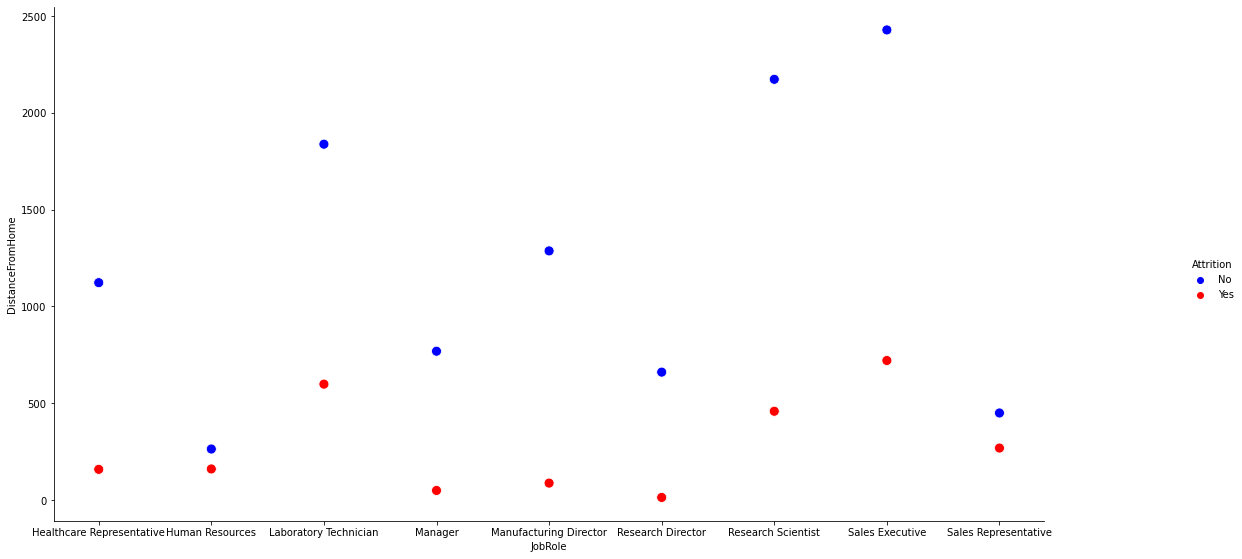

In [29]:

sns.relplot(x="JobRole", y="DistanceFromHome", 
            hue="Attrition",s=100,
            
             palette=["b", "r"], sizes=(10, 100),
            data=employees_breakdown);
fig = plt.gcf()
fig.set_size_inches(20, 8)

# comparison between average monthly income by education and attrition

In [38]:
inc=employees.groupby(['Attrition','Education'])['MonthlyIncome'].sum().reset_index()
inc

,Attrition,Education,MonthlyIncome
0,No,1,823732
1,No,2,1567482
2,No,3,3255621
3,No,4,2409857
4,No,5,368076
5,Yes,1,135165
6,Yes,2,188432
7,Yes,3,472254
8,Yes,4,309439
9,Yes,5,29251


 A graph showing comparison between average monthly income by education and attrition

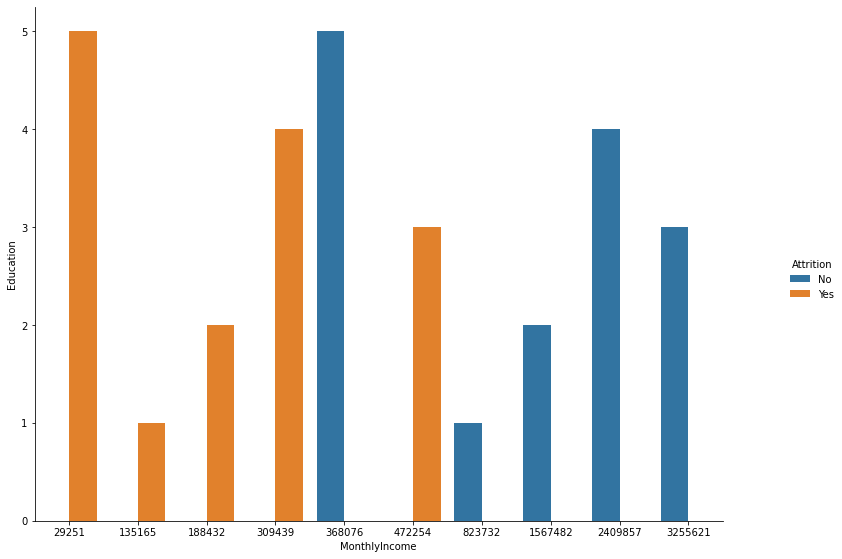

In [45]:
sns.catplot(x='MonthlyIncome',y='Education',hue='Attrition',data=inc,kind='bar')
fig = plt.gcf()
fig.set_size_inches(12, 8)